### Replicate focus- and single-cell gate from IDEAS using the SCI feature extraction tool

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import umap

# First set of features

This set included:
- tamuraContrast
- sobelRMS
- convexHullSize -> was not computed because the features is called sizeConvexHull
- mean
- aspectRatio

# Second set of features

This set included:
- tamuraContrast
- haralickContrast
- sobelRMS
- sizeConvexHull
- mean
- aspectRatio

In [9]:
df = pandas.read_csv("data/output_qcgate_ctrl1.csv")

In [10]:
df.head()

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,...,feat:haralickContrastANTIDIAGONAL-0,feat:haralickContrastANTIDIAGONAL-6,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:tamuraContrast-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:tamuraContrast-0
0,0,329.285714,221.836991,NaN,NaN,C1_T0_49.cif,784.781321,0.844818,NaN,7.407904,...,239.942966,NaN,NaN,NaN,NaN,NaN,NaN,150.273885,425.0,2.618321
1,17,254.525114,174.537594,173.700265,319.216535,C1_T0_49.cif,790.875635,0.805100,331.698413,8.205358,...,258.124424,526.492958,541.409524,0.0,0.166364,6.973067,NaN,179.701887,16.0,2.695776
2,9,177.014286,149.637755,192.710145,451.072727,C1_T0_49.cif,786.449231,0.668395,507.081633,10.636289,...,178.095238,522.152778,551.408451,27.5,0.238436,9.323335,0.565778,174.715847,59.0,3.300462
3,8,326.671756,243.118280,41.133333,28.125000,C1_T0_49.cif,781.070740,0.871051,272.000000,9.356657,...,298.349650,25.000000,38.000000,8.0,0.121139,5.345678,0.500000,239.905263,35.5,2.316414
4,1,288.768939,201.306709,154.128755,261.846608,C1_T0_49.cif,790.076389,0.973124,286.954683,8.370500,...,306.250000,483.513699,489.294964,430.0,0.114271,4.923754,0.882293,207.329073,405.0,2.558392


In [73]:
df["feat:haralickContrast-0"] = df.filter(regex="^feat:haralickContrast.*-0").mean(axis=1)

In [74]:
df.head()

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,...,feat:haralickContrastANTIDIAGONAL-6,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:tamuraContrast-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:tamuraContrast-0,feat:haralickContrast-0
0,0,329.285714,221.836991,NaN,NaN,C1_T0_49.cif,784.781321,0.844818,NaN,7.407904,...,NaN,NaN,NaN,NaN,NaN,NaN,150.273885,425.0,2.618321,235.334889
1,17,254.525114,174.537594,173.700265,319.216535,C1_T0_49.cif,790.875635,0.805100,331.698413,8.205358,...,526.492958,541.409524,0.0,0.166364,6.973067,NaN,179.701887,16.0,2.695776,216.722255
2,9,177.014286,149.637755,192.710145,451.072727,C1_T0_49.cif,786.449231,0.668395,507.081633,10.636289,...,522.152778,551.408451,27.5,0.238436,9.323335,0.565778,174.715847,59.0,3.300462,169.865781
3,8,326.671756,243.118280,41.133333,28.125000,C1_T0_49.cif,781.070740,0.871051,272.000000,9.356657,...,25.000000,38.000000,8.0,0.121139,5.345678,0.500000,239.905263,35.5,2.316414,277.011237
4,1,288.768939,201.306709,154.128755,261.846608,C1_T0_49.cif,790.076389,0.973124,286.954683,8.370500,...,483.513699,489.294964,430.0,0.114271,4.923754,0.882293,207.329073,405.0,2.558392,250.913681


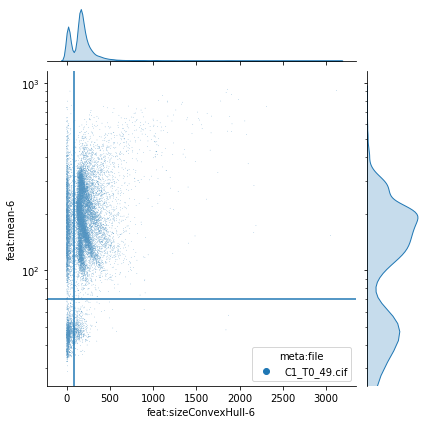

In [75]:
fig = seaborn.jointplot(data=df, x="feat:sizeConvexHull-6", y="feat:mean-6", hue="meta:file", kind="scatter", s=0.3)
fig.ax_joint.set_yscale("log")
fig.ax_joint.axvline(80)
fig.ax_joint.axhline(70)

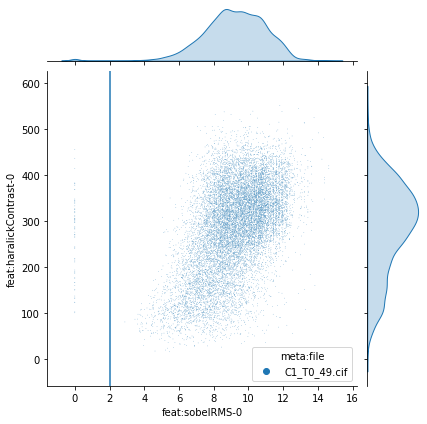

In [58]:
df_gate1 = df[(df["feat:sizeConvexHull-6"] > 80) & (df["feat:mean-6"] > 70)]
fig = seaborn.jointplot(data=df_gate1, x="feat:sobelRMS-0", y="feat:haralickContrast-0", hue="meta:file", kind="scatter", s=0.3)
fig.ax_joint.axvline(2)

Looks a lot better compared to tamuraContrast

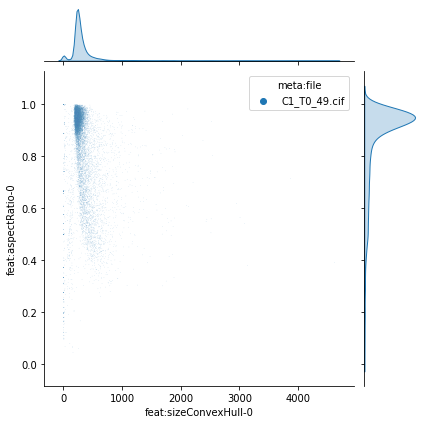

In [59]:
df_gate2 = df_gate1[df_gate1["feat:sobelRMS-0"] > 2]
seaborn.jointplot(data=df_gate2, x="feat:sizeConvexHull-0", y="feat:aspectRatio-0", hue="meta:file", s=0.2, alpha=0.5)

In [64]:
df_gate2[df_gate2["feat:sizeConvexHull-0"] == 0].head()

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,...,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:tamuraContrast-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:tamuraContrast-0,feat:haralickContrast,feat:haralickContrast-0
110,113,127.735537,92.051802,188.275053,211.231198,C1_T0_49.cif,790.516934,NaN,385.295522,7.899786,...,453.841216,443.0,0.181665,6.715188,0.800441,107.103015,0.0,2.100992,114.505074,114.505074
523,523,370.455357,364.236486,177.377907,517.352941,C1_T0_49.cif,789.836134,NaN,554.091837,8.307970,...,611.782609,155.0,0.196843,7.877675,0.931406,334.120805,0.0,3.117996,356.459684,356.459684
627,638,504.150327,370.984536,184.339056,421.013514,C1_T0_49.cif,788.212329,NaN,453.425676,9.999970,...,620.918919,213.0,0.175402,7.083683,0.938032,381.809278,0.0,3.008525,429.519054,429.519054
636,641,324.083815,233.885496,237.680000,226.715054,C1_T0_49.cif,789.223062,NaN,223.144737,7.637603,...,408.909375,474.5,0.132315,6.126814,0.934462,171.816377,0.0,2.002540,260.540531,260.540531
740,746,151.468750,122.272222,167.283520,210.692308,C1_T0_49.cif,788.468869,NaN,149.591474,6.430807,...,215.867882,726.0,0.088380,4.383819,0.403967,116.008104,0.0,1.673050,136.442330,136.442330


# Third set of features on ctrl and high

This set included:
- haralickContrast
- sobelRMS
- sizeConvexHull
- mean
- aspectRatio

In [13]:
df = pandas.read_csv("data/output_qcgate_ctrl1_high1.csv")

In [14]:
df["feat:haralickContrast-0"] = df.filter(regex="^feat:haralickContrast.*-0").mean(axis=1)

In [15]:
df.head()

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,meta:directory,feat:haralickContrastANTIDIAGONAL-0,feat:haralickContrastANTIDIAGONAL-6,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:haralickContrast-0
0,0,329.285714,221.836991,NaN,NaN,C1_T0_49.cif,784.781321,0.844818,NaN,7.407904,/home/maximl/Data/Experiment_data/weizmann/EhV...,239.942966,NaN,NaN,NaN,NaN,NaN,150.273885,425.0,235.334889
1,6,74.652778,90.642202,132.894273,427.990654,C1_T0_49.cif,789.036842,0.927086,416.710938,6.665780,/home/maximl/Data/Experiment_data/weizmann/EhV...,93.622517,532.675325,534.962500,163.5,4.677996,0.902343,115.740385,198.5,93.664470
2,10,373.226277,313.292553,183.475336,387.400000,C1_T0_49.cif,789.250000,0.799433,460.277778,8.554961,/home/maximl/Data/Experiment_data/weizmann/EhV...,330.063218,514.342342,568.467391,227.0,7.569376,0.802476,280.453125,316.0,324.258793
3,1,288.768939,201.306709,154.128755,261.846608,C1_T0_49.cif,790.076389,0.973124,286.954683,8.370500,/home/maximl/Data/Experiment_data/weizmann/EhV...,306.250000,483.513699,489.294964,430.0,4.923754,0.882293,207.329073,405.0,250.913681
4,9,177.014286,149.637755,192.710145,451.072727,C1_T0_49.cif,786.449231,0.668395,507.081633,10.636289,/home/maximl/Data/Experiment_data/weizmann/EhV...,178.095238,522.152778,551.408451,27.5,9.323335,0.565778,174.715847,59.0,169.865781


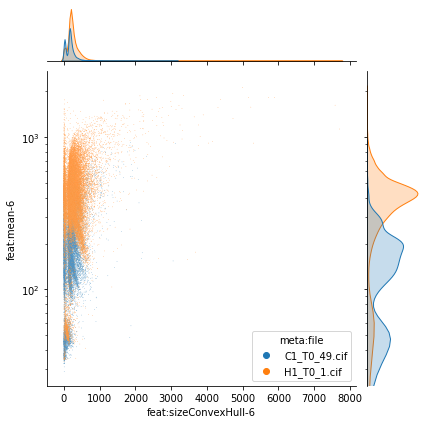

In [16]:
fig = seaborn.jointplot(data=df, x="feat:sizeConvexHull-6", y="feat:mean-6", hue="meta:file", kind="scatter", s=0.3)
fig.ax_joint.set_yscale("log")

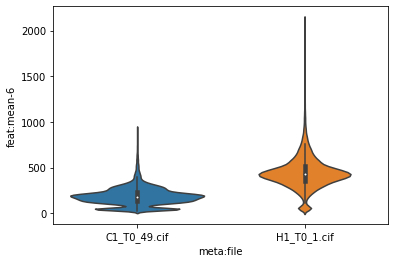

In [17]:
fig = seaborn.violinplot(data=df, y="feat:mean-6", x="meta:file", dodge=True)

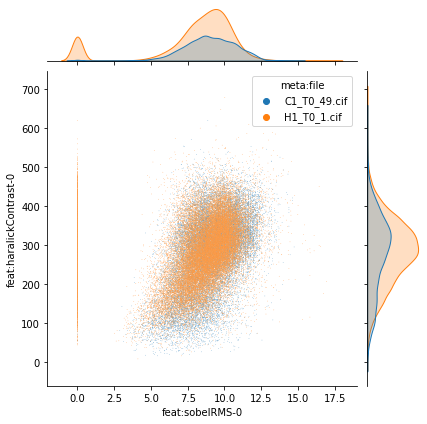

In [18]:
df_gate1 = df
fig = seaborn.jointplot(data=df_gate1, x="feat:sobelRMS-0", y="feat:haralickContrast-0", hue="meta:file", kind="scatter", s=0.3)

Lots of cells with feat:sobelRMS-0 == 0. Inspection of images in ImageJ suggests there could be an issue with this feature.

In [19]:
df_gate1[df_gate1["feat:sobelRMS-0"] == 0]

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,meta:directory,feat:haralickContrastANTIDIAGONAL-0,feat:haralickContrastANTIDIAGONAL-6,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:haralickContrast-0
708,712,156.842342,191.054902,151.539568,239.351916,C1_T0_49.cif,790.572152,0.651294,186.102236,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,198.485232,253.382114,295.941634,396.5,8.532147,0.755576,154.943463,406.5,175.331485
1306,1307,316.802920,275.604651,166.981132,449.201681,C1_T0_49.cif,789.670455,0.972359,521.286885,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,328.823077,639.793103,657.397727,178.0,6.961498,0.970981,288.182927,230.0,302.353394
1625,1623,101.805755,173.454023,287.436782,456.764045,C1_T0_49.cif,788.901460,0.871322,398.904255,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,182.746032,594.315789,587.158730,141.0,6.296667,0.891137,204.692771,238.0,165.674645
2003,2004,280.225455,216.868195,179.584112,428.777778,C1_T0_49.cif,784.845494,0.527389,489.707692,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,282.859779,611.010204,590.009615,195.5,5.986758,0.915776,323.032468,487.0,275.746474
2393,2395,433.389706,369.994152,114.010204,441.590476,C1_T0_49.cif,787.981481,0.964335,410.549550,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,397.492537,461.012500,473.641975,166.0,4.952701,0.934956,329.730994,240.0,382.651847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60112,40113,358.005917,99.151899,506.282051,249.389655,H1_T0_1.cif,782.448071,0.727450,412.769811,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,308.859296,426.769231,675.013889,367.0,5.979666,0.728241,338.991228,334.5,276.252085
60117,40115,374.190217,88.920833,488.978622,223.746835,H1_T0_1.cif,782.669565,0.844380,335.364865,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,361.744898,466.908397,543.063745,397.5,5.933347,0.808781,331.280488,331.5,289.034109
60120,40120,594.123188,101.670213,318.428571,263.188285,H1_T0_1.cif,782.021978,0.897659,438.355140,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,551.270833,571.540107,588.262295,307.5,9.345372,0.764545,616.302857,256.0,465.841773
60124,40126,589.801370,114.708108,435.592827,199.242515,H1_T0_1.cif,784.830065,0.354111,351.633238,0.0,/home/maximl/Data/Experiment_data/weizmann/EhV...,468.147059,400.012500,441.912698,480.5,6.415924,0.554207,582.404145,37.5,438.765170


*NOTE*: meta:id can be translated to series in a cif file (to open in imagej for example) -> series = meta:id*2+1, mask_series = meta:id*2+2

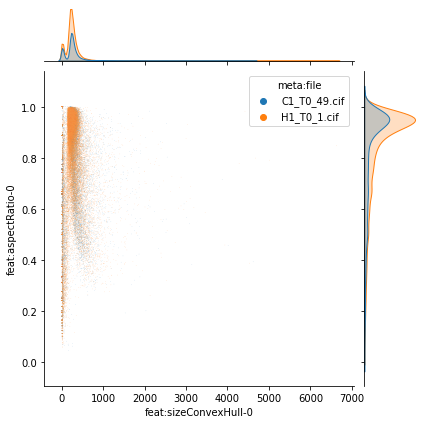

In [20]:
df_gate2 = df_gate1
seaborn.jointplot(data=df_gate2, x="feat:sizeConvexHull-0", y="feat:aspectRatio-0", hue="meta:file", s=0.2, alpha=0.5)

In [22]:
df_gate2[df_gate2["feat:sizeConvexHull-0"] == 0]

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,meta:directory,feat:haralickContrastANTIDIAGONAL-0,feat:haralickContrastANTIDIAGONAL-6,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:haralickContrast-0
32,35,149.028169,167.158654,368.960000,430.086614,C1_T0_49.cif,791.153623,NaN,420.420000,6.440528,/home/maximl/Data/Experiment_data/weizmann/EhV...,88.842520,702.380952,662.369231,50.0,6.612311,0.373272,155.637363,0.0,140.166676
62,58,188.205714,129.753425,64.416327,316.456140,C1_T0_49.cif,787.808333,NaN,380.045455,8.408725,/home/maximl/Data/Experiment_data/weizmann/EhV...,156.257143,266.921875,292.432432,10.5,5.956492,0.786652,121.608108,0.0,148.956097
67,71,382.882979,347.920000,48.666667,0.000000,C1_T0_49.cif,778.336538,NaN,213.200000,8.480080,/home/maximl/Data/Experiment_data/weizmann/EhV...,351.633333,0.000000,0.000000,21.0,6.198557,0.600196,342.669231,0.0,356.276386
109,113,127.735537,92.051802,188.275053,211.231198,C1_T0_49.cif,790.516934,NaN,385.295522,7.899786,/home/maximl/Data/Experiment_data/weizmann/EhV...,131.129944,481.342373,453.841216,443.0,6.715188,0.800441,107.103015,0.0,114.505074
465,468,341.109756,267.504902,145.051282,358.334906,C1_T0_49.cif,790.811075,NaN,372.495283,7.786219,/home/maximl/Data/Experiment_data/weizmann/EhV...,291.896552,569.305556,592.958084,0.0,6.065653,NaN,243.849515,0.0,286.090181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59926,39927,178.531250,267.539326,488.256250,543.705263,H1_T0_1.cif,781.497006,NaN,649.800000,8.923300,/home/maximl/Data/Experiment_data/weizmann/EhV...,150.000000,725.016393,769.098361,141.0,6.514775,0.922333,144.185567,0.0,185.064036
59932,39932,491.768844,355.848980,461.977337,285.042017,H1_T0_1.cif,780.430986,NaN,331.651982,9.096584,/home/maximl/Data/Experiment_data/weizmann/EhV...,449.531100,497.947368,567.083799,15.5,7.042960,0.243187,342.762295,0.0,409.977805
60045,40043,186.927361,103.991968,542.434447,108.191223,H1_T0_1.cif,782.104361,NaN,140.859706,6.791848,/home/maximl/Data/Experiment_data/weizmann/EhV...,140.784404,237.010850,255.083026,744.5,4.573570,0.832715,142.049145,0.0,143.438219
60065,40066,88.535714,234.075000,575.163522,379.541284,H1_T0_1.cif,774.330645,NaN,554.796875,13.311514,/home/maximl/Data/Experiment_data/weizmann/EhV...,314.464286,592.927273,605.924528,139.0,10.571775,0.519747,365.363636,0.0,250.609659


# Fourth set of features on high

This set included:
- haralickContrast
- sobelRMS -> potential fix (commit [c0fbc487fca4aaffd33bf83677786ecc71fbe2e3](https://github.com/MaximLippeveld/sci-java-mvn/commit/c0fbc487fca4aaffd33bf83677786ecc71fbe2e3))
- sizeConvexHull
- mean
- aspectRatio
- roundness

In [12]:
df = pandas.read_csv("data/output_qcgate_high1.csv")

In [3]:
df["feat:haralickContrast-0"] = df.filter(regex="^feat:haralickContrast.*-0").mean(axis=1)

In [4]:
df.head()

,meta:id,feat:haralickContrastDIAGONAL-0,feat:haralickContrastVERTICAL-0,feat:mean-6,feat:haralickContrastVERTICAL-6,meta:file,feat:mean-0,feat:aspectRatio-0,feat:haralickContrastHORIZONTAL-6,feat:sobelRMS-0,...,feat:haralickContrastANTIDIAGONAL-6,feat:roundness-0,feat:haralickContrastDIAGONAL-6,feat:sizeConvexHull-6,feat:sobelRMS-6,feat:aspectRatio-6,feat:haralickContrastHORIZONTAL-0,feat:sizeConvexHull-0,feat:roundness-6,feat:haralickContrast-0
0,6,373.604396,112.901786,462.707237,267.209091,H1_T0_1.cif,778.316614,0.915806,514.476440,65.823987,...,644.855346,0.915806,599.123529,283.5,85.162169,0.712235,417.677570,307.5,0.712235,342.831652
1,8,491.156250,346.455446,452.827586,414.312500,H1_T0_1.cif,775.220339,0.941335,522.698795,67.489932,...,686.253731,0.941335,688.861314,239.0,75.676480,0.893258,408.115000,275.5,0.893258,442.055071
2,4,293.867347,250.244444,430.104046,533.776699,H1_T0_1.cif,774.295238,0.881876,708.627660,65.228035,...,597.000000,0.881876,649.173333,157.5,71.781520,0.844419,315.384000,190.0,0.844419,291.170340
3,3,357.329114,219.681818,344.901709,369.837662,H1_T0_1.cif,773.829861,0.874675,510.652778,69.157161,...,629.513514,0.874675,615.533898,213.5,76.409044,0.859819,356.352941,271.0,0.859819,329.332745
4,7,424.790123,112.813953,463.575472,267.000000,H1_T0_1.cif,775.216667,0.852820,512.190244,63.649669,...,677.761628,0.852820,625.079096,295.0,80.623949,0.730803,378.683417,284.5,0.730803,337.835207


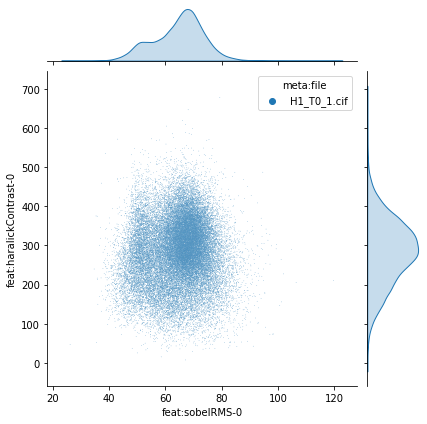

In [5]:
fig = seaborn.jointplot(data=df, x="feat:sobelRMS-0", y="feat:haralickContrast-0", hue="meta:file", kind="scatter", s=0.3)

Issue wit sobel seems fixed.

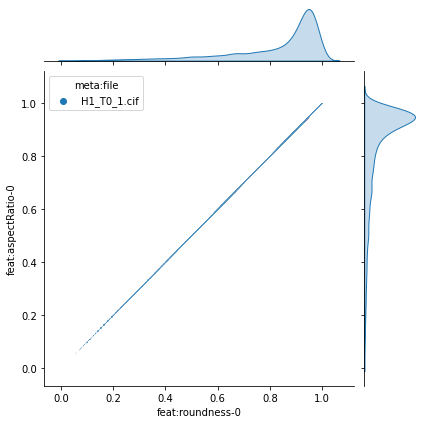

In [6]:
fig = seaborn.jointplot(data=df, x="feat:roundness-0", y="feat:aspectRatio-0", hue="meta:file", kind="scatter", s=0.3)

In [8]:
(df["feat:roundness-0"] - df["feat:aspectRatio-0"]).max()

7.771561172376096e-16

Conclusion: roundness == aspectRatio

# Comparing size, sizeMask and sizeConvexHull

In [24]:
df = pandas.read_csv("data/output_ctrl1_size.csv")

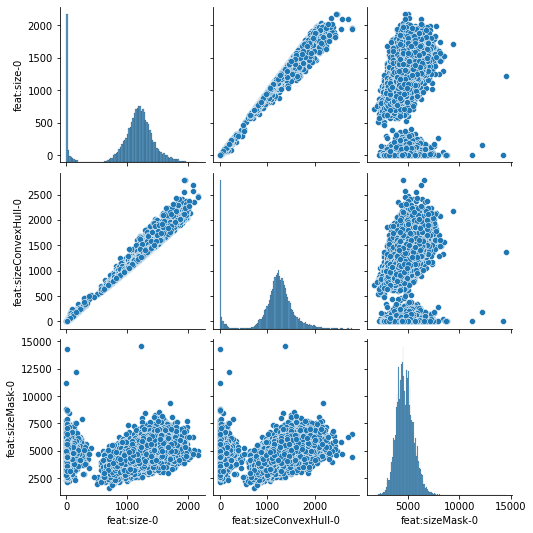

In [27]:
seaborn.pairplot(data=df.filter(regex="^feat:"))

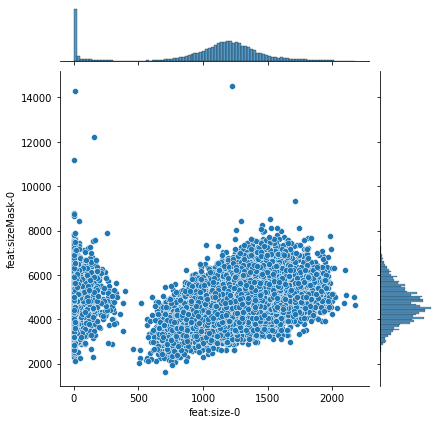

In [28]:
seaborn.jointplot(data=df, x="feat:size-0", y="feat:sizeMask-0")

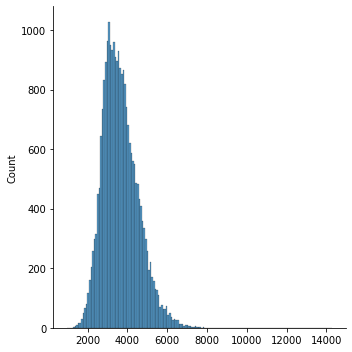

In [35]:
seaborn.displot(df["feat:sizeMask-0"] - df["feat:size-0"])

In [45]:
col = df["feat:size-0"]
df["feat:size-0norm"] = (col - col.min())/(col.max()-col.min())
col = df["feat:sizeMask-0"]
df["feat:sizeMask-0norm"] = (col - col.min())/(col.max()-col.min())

In [56]:
df["feat:size/sizeMask-0norm"] = df["feat:size-0norm"] / (df["feat:sizeMask-0norm"]+1)

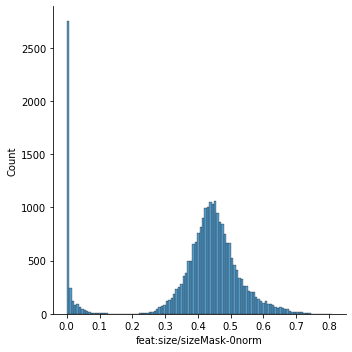

In [58]:
seaborn.displot(data=df, x="feat:size/sizeMask-0norm")

In [41]:
df[df["feat:size/sizeMask-0"] > 0.1].sort_values("feat:size/sizeMask-0")

,meta:id,meta:directory,meta:file,feat:size-0,feat:sizeConvexHull-0,feat:sizeMask-0,feat:size/sizeMask-0
6227,6227,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,297.5,343.5,2888.0,0.103012
17111,17111,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,380.5,446.5,3465.0,0.109812
3331,3331,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,523.0,551.0,4756.0,0.109966
5405,5405,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,604.5,628.5,4992.0,0.121094
14274,14274,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,707.5,791.0,5440.0,0.130055
...,...,...,...,...,...,...,...
8682,8682,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,1794.5,1904.0,3519.0,0.509946
13942,13942,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,1774.5,1840.0,3450.0,0.514348
19994,19994,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,1600.5,1710.5,3111.0,0.514465
23295,23295,/home/maximl/Data/Experiment_data/newcastle/wb...,all stains laser on 60x_1_Focused & Singlets &...,1742.0,1874.0,3355.0,0.519225


Gating the cells on size/sizeMask ratio allows us to filter out images with multiple components in the image.